<a href="https://colab.research.google.com/github/Choiyh1116/AI_capstone/blob/CHOI/practice/YoutubeToCsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import Youtube 안돼서 YoutubeVideo사용

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pytube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 2.7 MB/s 


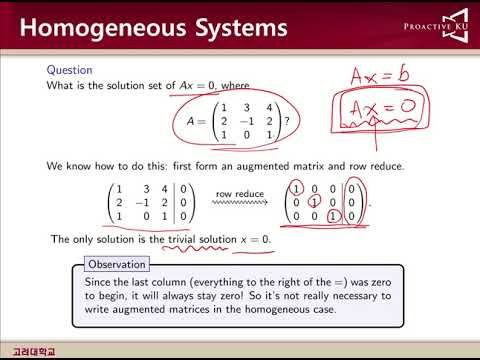

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('PLKpAgLNdNRn8k9JhkgjOkQiCr72mIYK3D')

In [4]:
from google.colab import drive
import os, sys
from pytube import YouTube
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/video")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
youtube = YouTube("https://www.youtube.com/watch?v=tx7ps9xWxdw&list=PLKpAgLNdNRn8k9JhkgjOkQiCr72mIYK3D")

print(youtube.title)
video = youtube.streams.get_highest_resolution()
video.download()

선형대수 넷째주 두번째 강의영상 1


'/content/drive/My Drive/video/선형대수 넷째주 두번째 강의영상 1.mp4'

In [ ]:
#%%time #코드 러닝타임 확인용

"""
현재 1초(30프레임)마다 넘겨보는 중 > frameGap 조절
비디오 경로 확인
colab에서도 csv파일 생성 잘 되는것 확인
"""

import torch
import cv2
import os
import numpy as np
import matplotlib.pylab as plt

#비디오 경로설정 필수
vidcap = cv2.VideoCapture('/content/drive/My Drive/video/2.mp4')
methods = ['CORREL', 'CHISQR', 'INTERSECT', 'BHATTACHARYYA', 'EMD']
hists = []

#csv파일관련, csv파일 이름, 경로설정 확인
cor, chi, ist, bha, emd, sct = list(), list(), list(), list(), list(), list()
filecsv = open("2.csv", "w")

#영상 못불러오면 코드종료
if not vidcap.isOpened():
    print("Could not Open")
    exit(0)

count = 0

#각각 영상 초당프레임, 총 프레임 수, 계산된 영상 길이(초단위)
fps = int(vidcap.get(cv2.CAP_PROP_FPS))
totalf = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
totalt = totalf/fps
print("FPS : %d\t영상길이 : %f"%(fps,totalt))

#코드돌리는시간이 너무 길다면, 조절한다 -> frameGap
frameGap = int(fps/1)
gapCount = int(frameGap-1)
#코드돌리는시간이 너무 길다면, 조절한다 -> maxFrame
maxFrame = int(totalf/1)

#그래프관련
xchuk = list()
howmany = 5  #x축 그래프 분할 확인용, 현재 5분할
graphtime = maxFrame/fps
itimes = int(graphtime/howmany)

#이미지 크기 조절 관련, 러닝타임 단축 기대, %%time으로 확인한 결과 효과없음, 오히려 지연됨
"""width = vidcap.get(cv2.CAP_PROP_FRAME_WIDTH)
height = vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT)
scale = 4"""

while(vidcap.isOpened()): 
    if(gapCount==0):
        ret, image = vidcap.read()
        gapCount = int(frameGap-1)
    else:
        ret = vidcap.grab()
        gapCount -= 1
        continue
    if ret:
        #image = cv2.resize(image, (int(width/scale), int(height/scale)))
        
        if(int (vidcap.get(1) % frameGap == 0)):
            if(int (vidcap.get(1) > maxFrame)):
                break
            hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
            hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
            cv2.normalize(hist, hist, 0, 1, cv2.NORM_MINMAX)
            hists.append(hist)
                
            if(len(hists)==2):
                query = hists[0]
                for index, name in enumerate(methods):
    
                    for i, histogram in enumerate(hists):
                        if(i == 0):
                            continue
                        compare = cv2.compareHist(query, histogram, index) 
        
                        if(index == cv2.HISTCMP_INTERSECT):
                            compare = compare/np.sum(query)
                        
                        if(name == 'CORREL'):
                            cor.append(compare)
                        if(name == 'CHISQR'):
                            chi.append(compare)
                            xchuk.append(int(vidcap.get(1))/30)
                        if(name == 'INTERSECT'):
                            ist.append(compare)
                        if(name == 'BHATTACHARYYA'):
                            bha.append(compare)
                        if(name == 'EMD'):
                            emd.append(compare)
                            sct.append(0)
                            
                del(hists[0])
            
            
            count += 1
    else:
        break
        
filecsv.write('CORREL,CHISQR,INTERSECT,BHATTACHARYYA,EMD,Screen_Transition\n')
for i in range(len(cor)):
    filecsv.write(str(cor[i]) + ',' + str(chi[i]) + ',' + str(ist[i]) + ',' + str(bha[i]) + ',' + str(emd[i]) + ',' + str(sct[i]) + '\n')
    
filecsv.close()

"""for i in range(0,howmany):
    plt.xlim(i*itimes,(i+1)*itimes)
    plt.plot(xchuk, cor)
    plt.show()
    plt.xlim(i*itimes,(i+1)*itimes)
    plt.plot(xchuk, chi)
    plt.show()
    plt.xlim(i*itimes,(i+1)*itimes)
    plt.plot(xchuk, ist)
    plt.show()
    plt.xlim(i*itimes,(i+1)*itimes)
    plt.plot(xchuk, bha)
    plt.show()
    plt.xlim(i*itimes,(i+1)*itimes)
    plt.plot(xchuk, emd)
    plt.show()

plt.plot(xchuk, cor)
plt.show()
plt.plot(xchuk, chi)
plt.show()
plt.plot(xchuk, ist)
plt.show()
plt.plot(xchuk, bha)
plt.show()
plt.plot(xchuk, emd)
plt.show()"""

del(cor,chi,ist,bha,emd,sct)

vidcap.release()

print("코드 구동 종료")

FPS : 10	영상길이 : 1392.700000
코드 구동 종료
